Swianiewicz Aneta
<br>
UID: 3035651391


# Assignment 1: HELOC Data Analysis
<br>
Consider an anonymized data of Home Equity Line of Credit (HELOC) loans, with the
dataset URLs provided by the STAT3612 course website. The target variable <b>RiskFlag</b>
indicates whether the loan is ever 90-day delinquent over a two-year period. The feature
variables are pulled from the credit bureau and their descriptions can be referred to the data
dictionary file. Some special values are also described in the data dictionary.
<br>
<br>
In this assignment you are required to perform the <b>exploratory data analysis</b> and <b>generalized
linear modeling</b>. You will need to submit your works in the Python notebook format, with
reproducible Python codes and adequate description. Indicate your name and UID in the
first cell of the notebook.

In [839]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb # importing relevant libraries

hdata = pd.read_csv('HelocData.csv')
hdatadict = pd.read_excel('HelocDataDict.xlsx')

In [840]:
print(hdata.info())
print(hdata.head())

hdata['RiskFlag'] = hdata.RiskFlag.astype("category")

print(hdatadict.info())
print(hdatadict) # preliminary look into the data composition


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
RiskFlag    10459 non-null object
x1          10459 non-null int64
x2          10459 non-null int64
x3          10459 non-null int64
x4          10459 non-null int64
x5          10459 non-null int64
x6          10459 non-null int64
x7          10459 non-null int64
x8          10459 non-null int64
x9          10459 non-null int64
x10         10459 non-null int64
x11         10459 non-null int64
x12         10459 non-null int64
x13         10459 non-null int64
x14         10459 non-null int64
x15         10459 non-null int64
x16         10459 non-null int64
x17         10459 non-null int64
x18         10459 non-null int64
x19         10459 non-null int64
x20         10459 non-null int64
x21         10459 non-null int64
x22         10459 non-null int64
x23         10459 non-null int64
dtypes: int64(23), object(1)
memory usage: 1.9+ MB
None
  RiskFlag  x1   x2  x3   x4  x5  x6  x7  

In [843]:
# variables descibed as percent: x8, x14, x23, should have value between 0 and 1 or 0% and 100%
# cleaning up the descriptions

hdatadict.at[0, "Description"] = "Paid as negotiated flag (12-36 Months)"
hdatadict.at[10,"Description"] = "Max Delq/Public Records Last 12 Months"
hdatadict.at[11,"Description"] = "Max Delinquency Ever"
hdatadict.at[12,"Description"] = "Number of Total Trades"
hdatadict.at[17,"Description"] = "Number of Inq Last 6 Months excl 7days"
hdatadict.at[18,"Description"] = "Net Fraction Revolving Burden"
hdatadict.at[19,"Description"] = "Net Fraction Installment Burden"


In [844]:
# checking how many categories the variable is divided into and how are they distributed
print(list(hdata.RiskFlag.unique()))
print(hdata["RiskFlag"].value_counts())

['Bad', 'Good']
Bad     5459
Good    5000
Name: RiskFlag, dtype: int64


(1). (20%) The negative values (-7, -8, -9) for each variable can be be regarded as missing
information. Calculate the missing value frequencies separately for each feature, then visualize
the result by a bar chart

In [845]:
hdata.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [846]:
# replacing (-7, -8, -9) with NaN

hdata_nan = hdata.copy()

hdata_nan = hdata_nan.replace((-9), np.nan)
hdata_nan = hdata_nan.replace((-8), np.nan)
hdata_nan = hdata_nan.replace((-7), np.nan)

x = hdata_nan.count()
y = hdata.count()
z = hdata.count() - hdata_nan.count()

freq_nm = round((x/y) * 100, 1) # percentage of values that are not missing 

freq = round((z/y) * 100, 1) # percentage of missing values in each column


In [847]:
print("Number of data point for a given feature:", x)

Number of data point for a given feature: RiskFlag    10459
x1           9861
x2           9632
x3           9871
x4           9871
x5           9871
x6           9871
x7           9871
x8           9871
x9           5031
x10          9871
x11          9871
x12          9871
x13          9871
x14          9871
x15          7540
x16          9871
x17          9871
x18          9685
x19          6452
x20          9715
x21          9010
x22          9288
x23          9853
dtype: int64


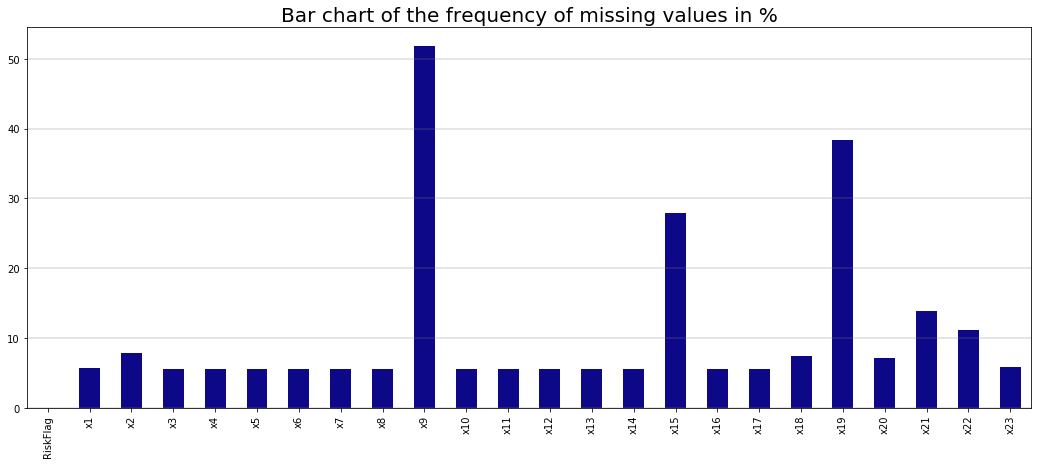

In [848]:
freq.plot.bar(figsize=(18,7), cmap = "plasma")
plt.grid(color='grey', axis='y', linewidth=.4)
plt.title('Bar chart of the frequency of missing values in %', fontsize=20)

plt.show() # visualizing the frequency of missing values

In [849]:
# x9, x15, x19 have  high frequency of missing values; they are extremely unlikely to be accurate predictors

In [850]:
# deleting x9, x15, x19
hdata_nan = hdata_nan.drop(columns=["x9","x15","x19"])

hdata_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 21 columns):
RiskFlag    10459 non-null category
x1          9861 non-null float64
x2          9632 non-null float64
x3          9871 non-null float64
x4          9871 non-null float64
x5          9871 non-null float64
x6          9871 non-null float64
x7          9871 non-null float64
x8          9871 non-null float64
x10         9871 non-null float64
x11         9871 non-null float64
x12         9871 non-null float64
x13         9871 non-null float64
x14         9871 non-null float64
x16         9871 non-null float64
x17         9871 non-null float64
x18         9685 non-null float64
x20         9715 non-null float64
x21         9010 non-null float64
x22         9288 non-null float64
x23         9853 non-null float64
dtypes: category(1), float64(20)
memory usage: 1.6 MB


(2). (20%) Use np.random.seed to set your UID as the random seed, then split the data
into training (80%) and testing (20%) sets. For each feature variable in the training data,
impute the missing values by the mean of observed values.

In [851]:
# replace the missing values by the mean of observed values
# done it on the whole data set so the missing values don't get in the way when testing prediction accuracy

for col in hdata_nan.iloc[:,1:]:
    x = np.mean(hdata_nan[col])
    hdata_nan[col] = hdata_nan[col].fillna(x)

hdata_train.iloc[:,1:24] = hdata_train.iloc[:,1:].astype(int) #Converting to int

# Splitting the data into a training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(3035651391)

hdata_train,hdata_test = train_test_split(hdata_nan,test_size=0.2) 

(3). (20%) For the training data, draw the boxplot for each feature variable as grouped
by RiskFlag. Lay out all the plots appropriately and annotate each box plot with the
corresponding feature name.

In [852]:
label = hdatadict["Description"].tolist()
columns = list(hdata)

d = dict(zip(columns, label))
described_hdata_train = hdata_train.rename(d, axis='columns') # alternative df with variable description 

col_list = list(hdata_train) # creating an iterable list of undescribed variables
col_list.pop(0)


'RiskFlag'

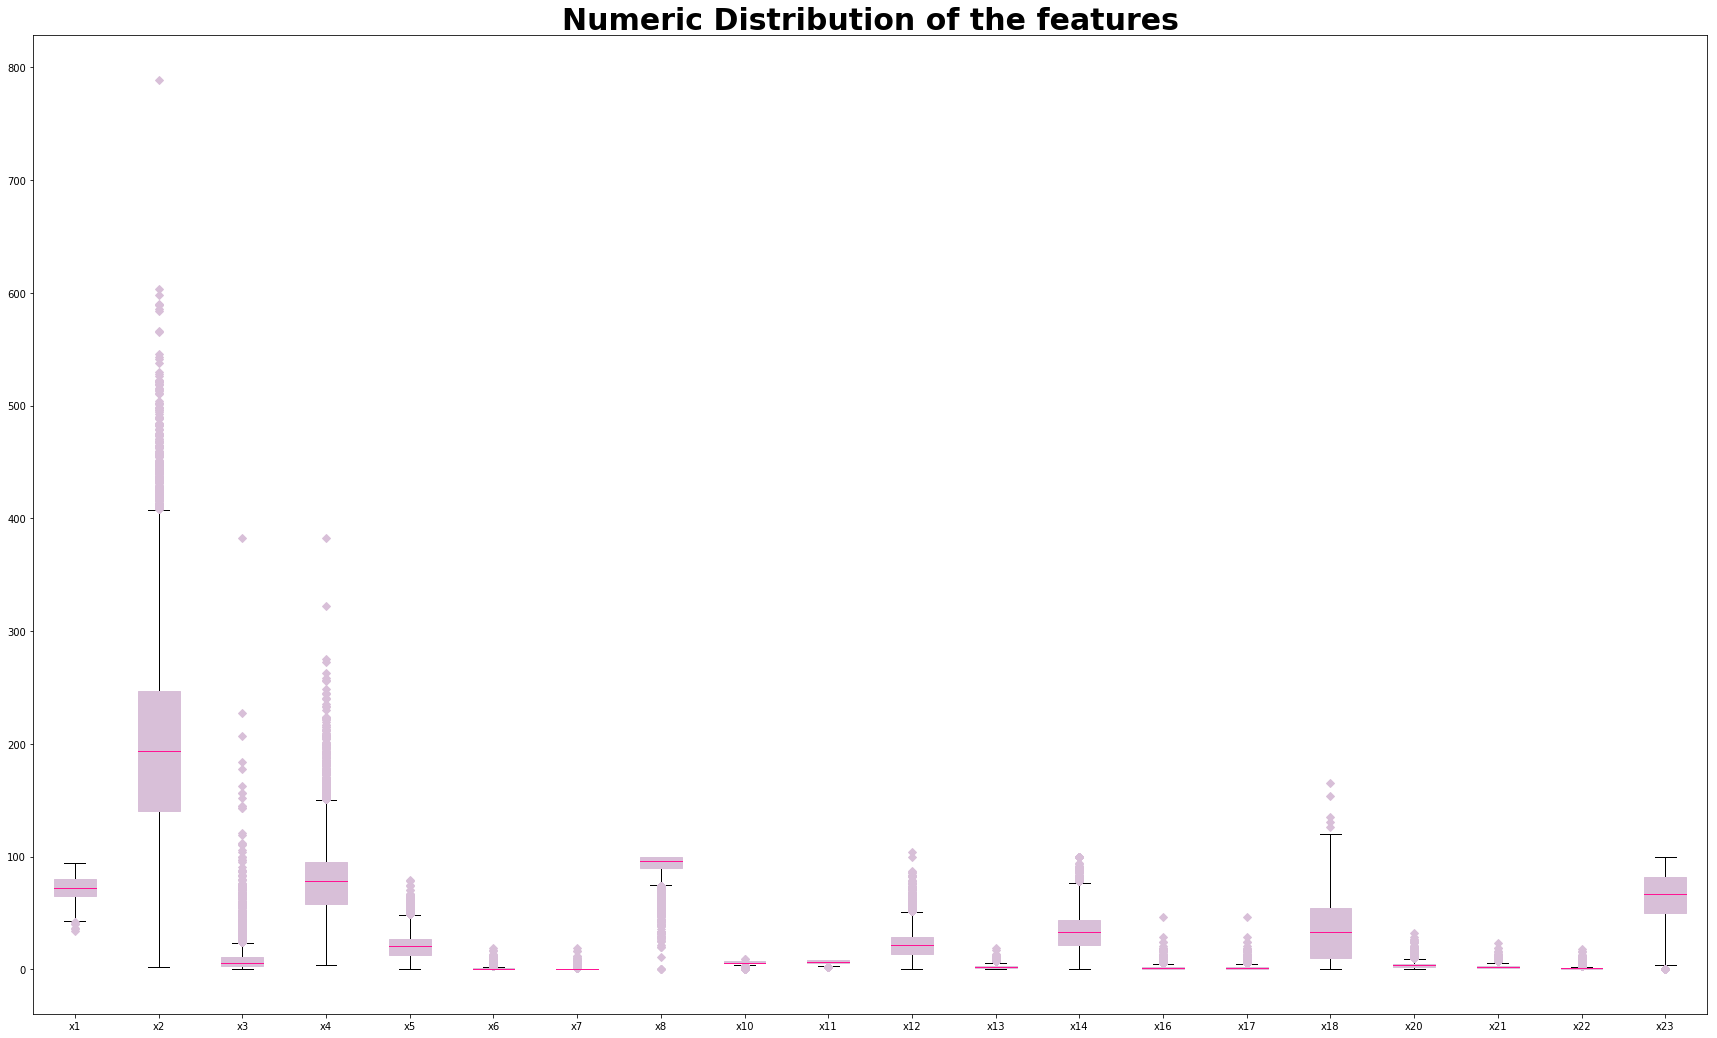

In [853]:
# drawing a boxplot for numeric distribution of the features

hdata_train.iloc[:,1:].plot.box(grid=False, figsize=(30,18),
                              color = dict(boxes='#D8BFD8', medians='#FF1493', whiskers='black', caps='black'),
                              patch_artist=True, flierprops = dict(markerfacecolor ='#D8BFD8', markeredgecolor ='#D8BFD8', marker='D'))
plt.title('Numeric Distribution of the features',fontsize=30, fontweight="bold")
plt.show()


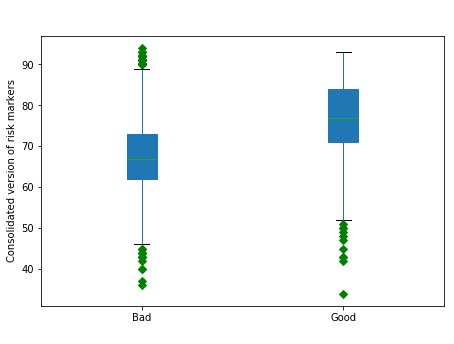

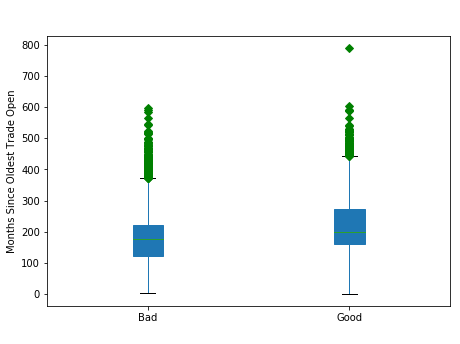

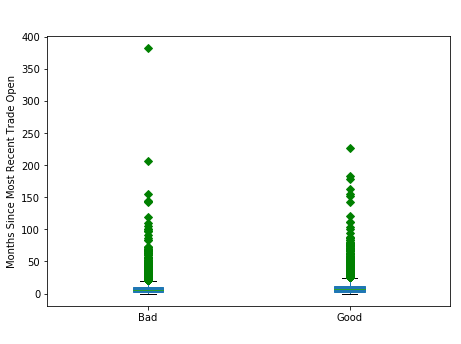

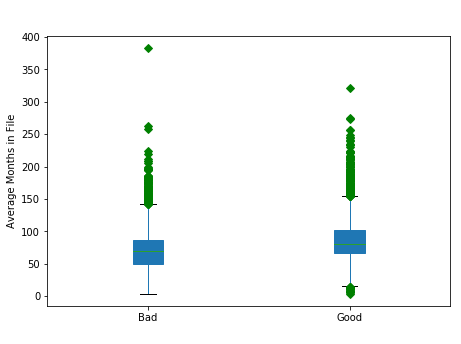

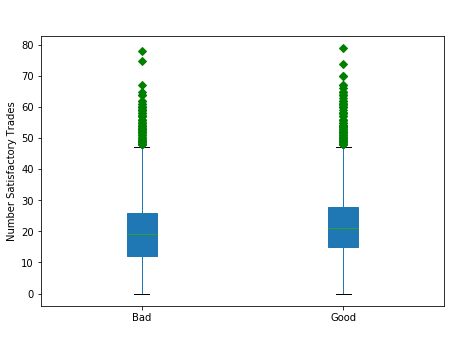

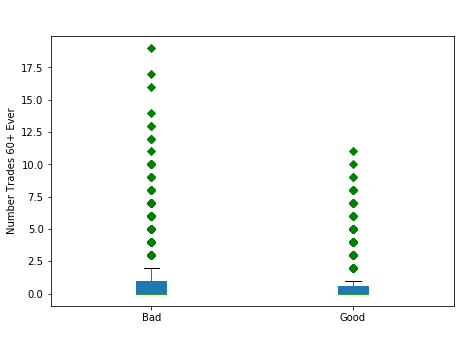

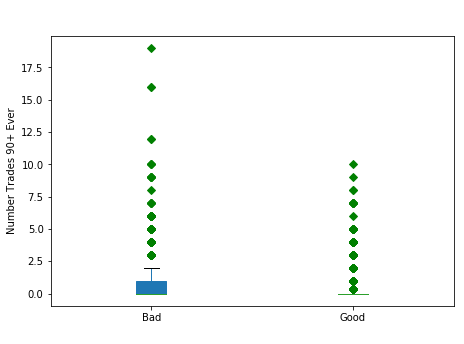

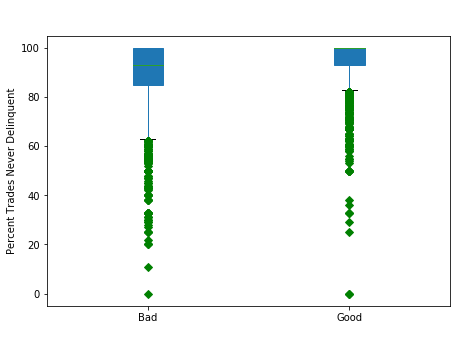

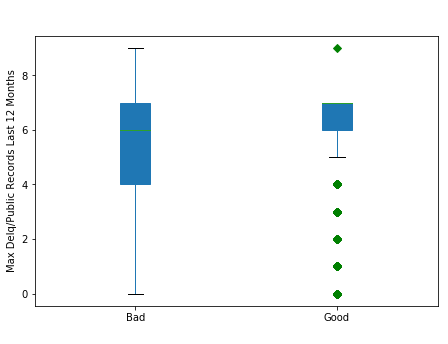

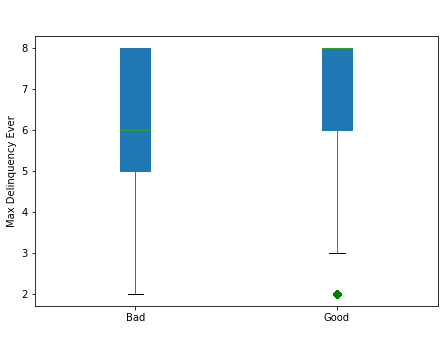

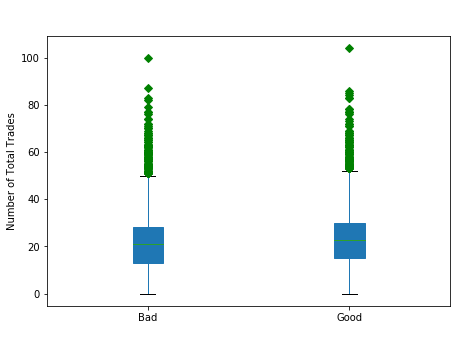

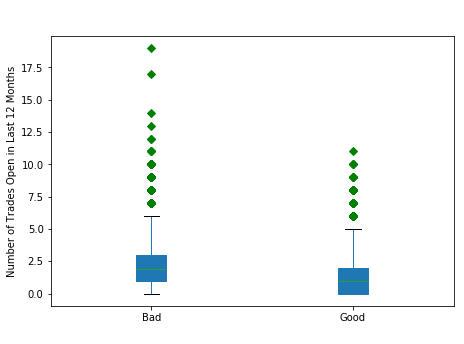

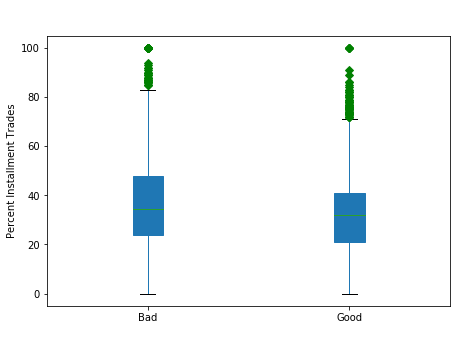

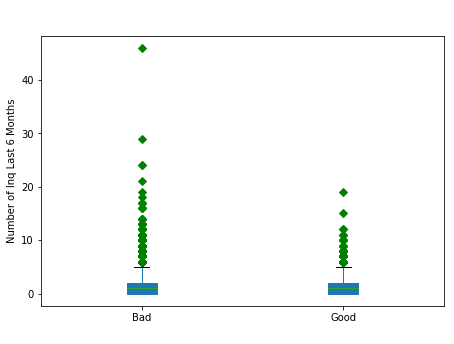

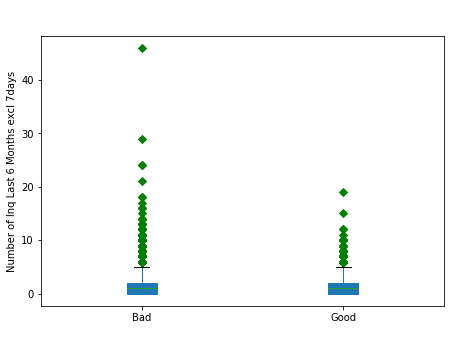

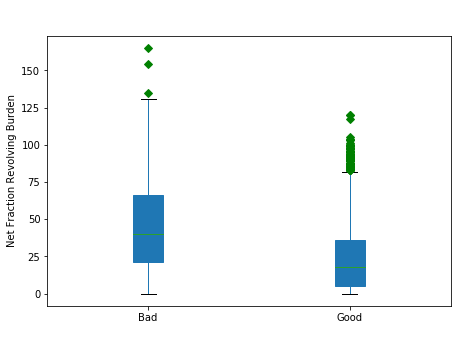

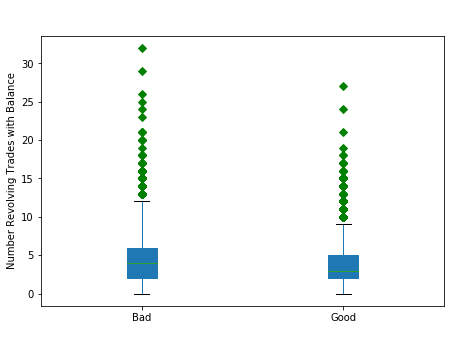

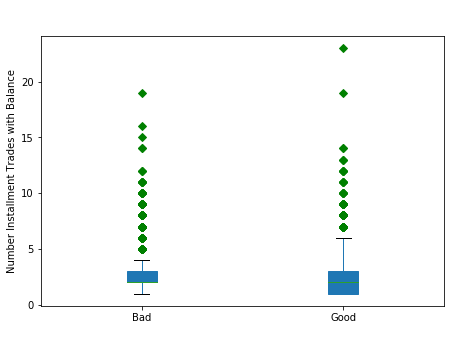

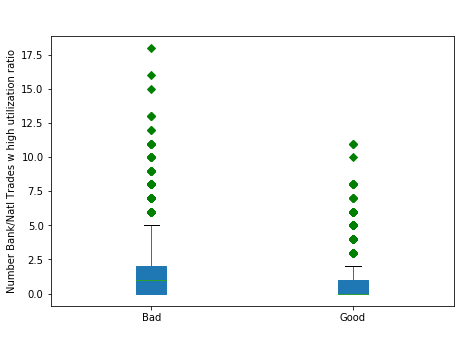

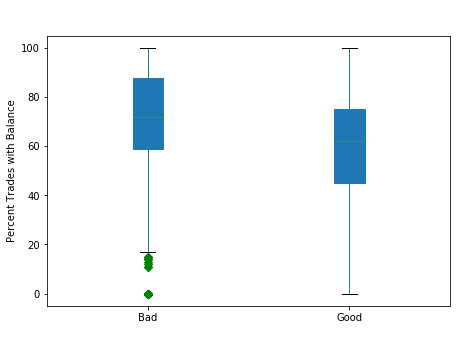

In [877]:
# drawing a boxplot for each feature variable as grouped by RiskFlag on separate figures 
# since there is a large discrepancy in numeric distribution of the features 


for col in described_hdata_train.columns[1:]:
    described_hdata_train.boxplot(column = col, by="Paid as negotiated flag (12-36 Months)", figsize = (7, 5), 
                        grid = False, patch_artist = True, flierprops = dict(markerfacecolor ='green', markeredgecolor ='green', marker='D'))
    plt.title(' ')
    plt.suptitle(' ')
    plt.xlabel(' ')
    plt.ylabel(col, rotation=90)



In [761]:
hdata_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x16,x17,x18,x20,x21,x22,x23
count,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000
mean,72.019410,200.574674,9.590324,78.651681,21.111701,0.581921,0.386793,92.345970,5.751430,6.364113,22.656764,1.865609,34.506909,1.457331,1.399194,34.928690,4.116568,2.482100,1.103900,66.361506
std,9.580843,93.533209,12.921158,33.101180,10.985421,1.213823,0.975324,11.462919,1.603819,1.806240,12.650916,1.760951,17.448745,2.012598,1.969319,27.874404,2.939512,1.520876,1.479013,21.406105
min,34.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,65.000000,140.000000,3.000000,58.000000,13.000000,0.000000,0.000000,90.000000,5.757978,6.000000,14.000000,1.000000,22.000000,0.000000,0.000000,10.000000,2.000000,1.000000,0.000000,50.000000
50%,72.000000,194.000000,6.000000,78.000000,21.000000,0.000000,0.000000,96.000000,6.000000,6.374531,22.000000,1.863844,33.000000,1.000000,1.000000,33.000000,4.000000,2.000000,1.000000,67.000000
75%,80.000000,247.000000,11.000000,95.000000,27.000000,1.000000,0.384763,100.000000,7.000000,8.000000,29.000000,3.000000,44.000000,2.000000,2.000000,54.000000,5.000000,3.000000,1.092270,82.000000
max,94.000000,789.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,9.000000,8.000000,104.000000,19.000000,100.000000,46.000000,46.000000,165.000000,32.000000,23.000000,18.000000,100.000000


(4). (20%) Select top-5 features based on the boxplots and elaborate your reasons of such
choices. Fit a <b>logistic model</b> on the training data with selected features. Rank-order the
variable importance based on the Wald tests.

In [764]:
d

{'RiskFlag': 'Paid as negotiated flag (12-36 Months). String of Good and Bad',
 'x1': 'Consolidated version of risk markers',
 'x2': 'Months Since Oldest Trade Open',
 'x3': 'Months Since Most Recent Trade Open',
 'x4': 'Average Months in File',
 'x5': 'Number Satisfactory Trades',
 'x6': 'Number Trades 60+ Ever',
 'x7': 'Number Trades 90+ Ever',
 'x8': 'Percent Trades Never Delinquent',
 'x9': 'Months Since Most Recent Delinquency',
 'x10': 'Max Delq/Public Records Last 12 Months. See tab "MaxDelq" for each category',
 'x11': 'Max Delinquency Ever. See tab "MaxDelq" for each category',
 'x12': 'Number of Total Trades (total number of credit accounts)',
 'x13': 'Number of Trades Open in Last 12 Months',
 'x14': 'Percent Installment Trades',
 'x15': 'Months Since Most Recent Inq excl 7days',
 'x16': 'Number of Inq Last 6 Months',
 'x17': 'Number of Inq Last 6 Months excl 7days. Excluding the last 7 days removes inquiries that are likely due to price comparision shopping.',
 'x18': 'Net 

In [895]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

i_var = hdata_train.iloc[:,1:]  #independent columns
target = hdata_train.iloc[:,0]    #target column

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(i_var,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(i_var.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

   Specs         Score
15   x18  22043.309558
1     x2  15109.062866
3     x4   6387.330237
19   x23   4133.309684
0     x1   2132.369590


In [934]:
top5_train = hdata_train.loc[:,["RiskFlag","x2","x1","x18","x4","x23"]]
top5_test = hdata_test.loc[:,["RiskFlag","x2","x1","x18","x4","x23"]]


'x2': 'Months Since Oldest Trade Open'<br>
'x5': 'Number Satisfactory Trades'<br>
'x8': 'Percent Trades Never Delinquent'<br>
'x17': 'Number of Inq Last 6 Months excl 7days. Excluding the last 7 days removes inquiries that are likely due to price comparision shopping.'<br>
'x22': 'Number Bank/Natl Trades w high utilization ratio'<br>

Reasons:
 - Low outliers
 - Low frequency of missing values
 - Deemed most predictive by SelectKBest

In [930]:
# generate the x_train and y_train
x_train = top5_train.iloc[:,1:]
y_train = top5_train.iloc[:,0]

x_test = top5_test.iloc[:,1:]
y_test = top5_test.iloc[:,0]

In [931]:
# fit the logit model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e8, solver = 'liblinear', penalty = "l1")
logreg.fit(x_train, y_train)

y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

print("Coefficients :", np.round(logreg.intercept_,4), np.round(logreg.coef_,4))

Coefficients : [-6.5152] [[ 0.0015  0.0864 -0.0079  0.0056 -0.004 ]]


In [956]:
# # Rank-order the variable importance based on the Wald tests.

# import statsmodels.api as sm
# y = np.asarray(hdata_train.iloc[:,0])
# X = np.asarray(hdata_train.iloc[:,1:])

# # does not work for logistic regression since y is categorical
# model = sm.OLS(y, X)
# results = model.fit()
# print(model.summary())

(5). (20%) Interpret the fitted logistic model in (4). Then, test its performance on the
testing data and report the prediction accuracy

In [828]:
# accuracy score 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on the training set =', np.round(accuracy_train,4))
print('Accuracy on the test set =', np.round(accuracy_test,4))

Accuracy on the training set = 0.709
Accuracy on the test set = 0.7108


In [829]:
# classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         Bad       0.71      0.76      0.73      1094
        Good       0.71      0.66      0.69       998

   micro avg       0.71      0.71      0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092



In [830]:
# the confusion matrix of the test and predicted test data
cf_mat = confusion_matrix(y_test, y_pred_test).T
cf_mat

array([[829, 340],
       [265, 658]])

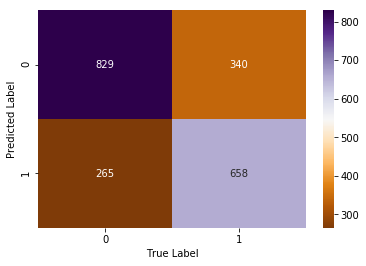

In [831]:
# visualising the confusion matrix 
sb.heatmap(cf_mat,annot=True,cmap='PuOr', fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()